# Predicting Heart Disease using Artificial Neural Network

This notebook looks into using various Python-bases DL and data science libraries in an attempt to buuild a DL model capable of prediction whether or not someone has heart disese based on their medical attributes.

We're going to take the following approach:

Problem defination
Data
Evaluation
Features
Modelling
Experimentation

# 1. Problem Defination

Given a clinical parameters about the patient, can we predict whether or not they have heart disease?

# 2. Data

The original data came from the cleaveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it availaible on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

# 3. Evaluation

If we can reach good accuracy at predicting whether or not a patient has heart disese during the proof of concept, we'll pursue the project.The evaluation is done on the basis of Confusion Matrix

# 4. Features

This is where we will get different information about each of the features in your data.

Create data dictionary

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
Preparing the tools

Importing all the necessary tools

In [9]:
# Regular EDA and plotting tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

df = pd.read_csv("augmented_data.csv") #cleaned_data
df.shape  

(1353, 25)

# Data Exploration

The goal here is to find more about the data and become subject matter expert on the data we are working with.

What question(s) we are trying to solve?
What kind of data do we have and how do we treat differnt types ?
What's missing from the data and how do you deal with it ?
Where are the outliers and why should we care about them ?
How can you add, change or remove features to get more out of your data ?

In [10]:

df


,Unnamed: 0,estado_vital,edad,sexo,peso,hipertension_arterial,diabetes_mellitus,tabaquismo,frecuencia_cardiaca,presion_arterial_sistolica,...,insuficiencia_renal_cronica,ieca,furosemida,otros_diureticos,clopidogrel,trigliceridos,glicemia,colesterol,escala_grace,dialisis
0,0,0,13,0,85,1,0,0,60,120,...,0,1,0,1,1,2.4,7.2,5.6,46,0
1,1,0,15,0,57,1,1,1,95,120,...,0,1,0,0,1,1.8,10.8,4.8,58,0
2,2,0,19,0,65,1,0,0,67,120,...,0,0,1,0,1,0.6,10.2,3.8,34,0
3,3,0,23,1,70,1,0,0,88,120,...,0,1,0,1,1,0.6,4.7,5.4,53,0
4,4,0,28,1,75,1,0,1,77,160,...,0,1,0,0,1,0.9,6.2,2.9,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,1348,0,94,1,65,1,0,1,72,130,...,0,0,0,0,1,1.1,5.8,3.3,142,0
1349,1349,0,94,1,65,1,0,1,72,130,...,0,0,0,0,1,1.1,5.8,3.3,142,0
1350,1350,0,94,0,45,1,0,0,85,120,...,1,1,0,0,1,0.9,8.6,3.7,154,0
1351,1351,1,96,0,65,1,0,0,56,110,...,0,1,1,0,1,1.5,18.6,5.0,155,0


<Axes: >

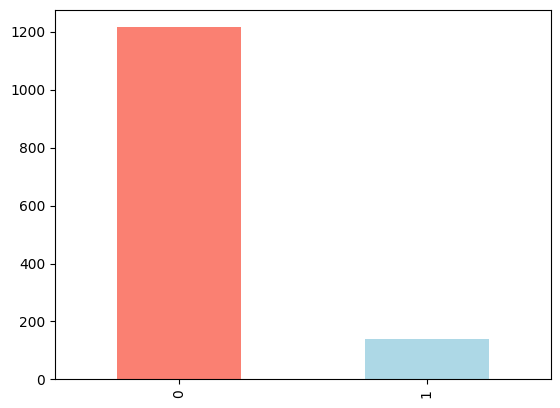

In [11]:
df.estado_vital.value_counts()


# lets visualize the estado_vital variable

df.estado_vital.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [12]:

df.info()

df.isnull().sum()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1353 non-null   int64  
 1   estado_vital                 1353 non-null   int64  
 2   edad                         1353 non-null   int64  
 3   sexo                         1353 non-null   int64  
 4   peso                         1353 non-null   int64  
 5   hipertension_arterial        1353 non-null   int64  
 6   diabetes_mellitus            1353 non-null   int64  
 7   tabaquismo                   1353 non-null   int64  
 8   frecuencia_cardiaca          1353 non-null   int64  
 9   presion_arterial_sistolica   1353 non-null   int64  
 10  presion_arterial_diastolica  1353 non-null   int64  
 11  hb                           1353 non-null   int64  
 12  creatinina                   1353 non-null   float64
 13  ckmb              

,Unnamed: 0,estado_vital,edad,sexo,peso,hipertension_arterial,diabetes_mellitus,tabaquismo,frecuencia_cardiaca,presion_arterial_sistolica,...,insuficiencia_renal_cronica,ieca,furosemida,otros_diureticos,clopidogrel,trigliceridos,glicemia,colesterol,escala_grace,dialisis
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,...,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,676.000000,0.101996,66.220990,0.678492,73.026608,0.849224,0.294900,0.478197,84.853659,125.937177,...,0.032520,0.872136,0.182557,0.515152,0.961567,1.330968,7.530451,4.781153,109.902439,0.005913
std,390.721768,0.302754,12.655743,0.467228,11.982885,0.357963,0.456167,0.499709,14.946676,22.987900,...,0.177443,0.334062,0.386446,0.499955,0.192311,0.684655,3.480904,1.076720,26.959688,0.076695
min,0.000000,0.000000,13.000000,0.000000,40.000000,0.000000,0.000000,0.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000,0.500000,34.000000,0.000000
25%,338.000000,0.000000,57.000000,0.000000,65.000000,1.000000,0.000000,0.000000,78.000000,120.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.900000,5.400000,4.100000,89.000000,0.000000
50%,676.000000,0.000000,67.000000,1.000000,72.000000,1.000000,0.000000,0.000000,86.000000,130.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.200000,6.400000,4.900000,110.000000,0.000000
75%,1014.000000,0.000000,75.000000,1.000000,80.000000,1.000000,1.000000,1.000000,88.000000,130.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.500000,8.300000,5.400000,128.000000,0.000000
max,1352.000000,1.000000,98.000000,1.000000,150.000000,1.000000,1.000000,1.000000,180.000000,240.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,43.000000,10.000000,190.000000,1.000000


In [13]:
df.sexo.value_counts() # 1=male, 0=female

1    918
0    435
Name: sexo, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

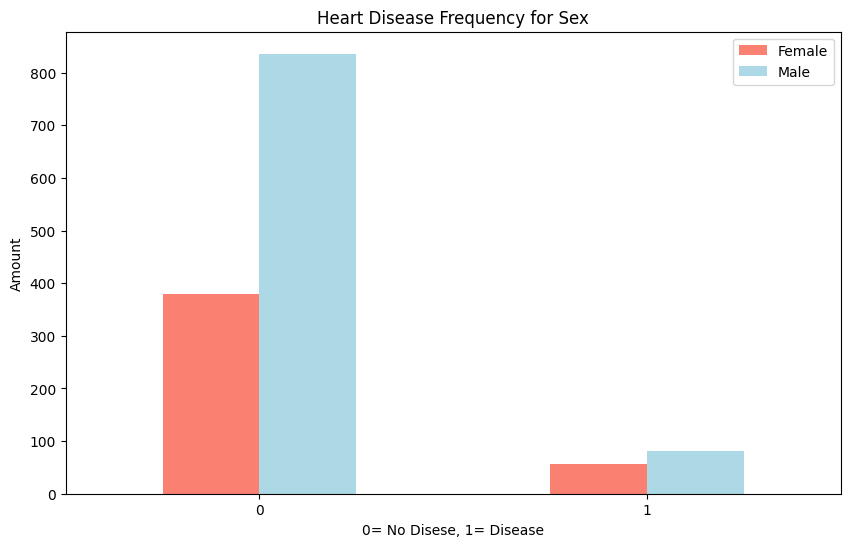

In [14]:
# Compare target column to sex column
pd.crosstab(df.estado_vital, df.sexo)

# lest visualize more
pd.crosstab(df.estado_vital, df.sexo).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon","lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disese, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

plt.xticks(rotation=0)

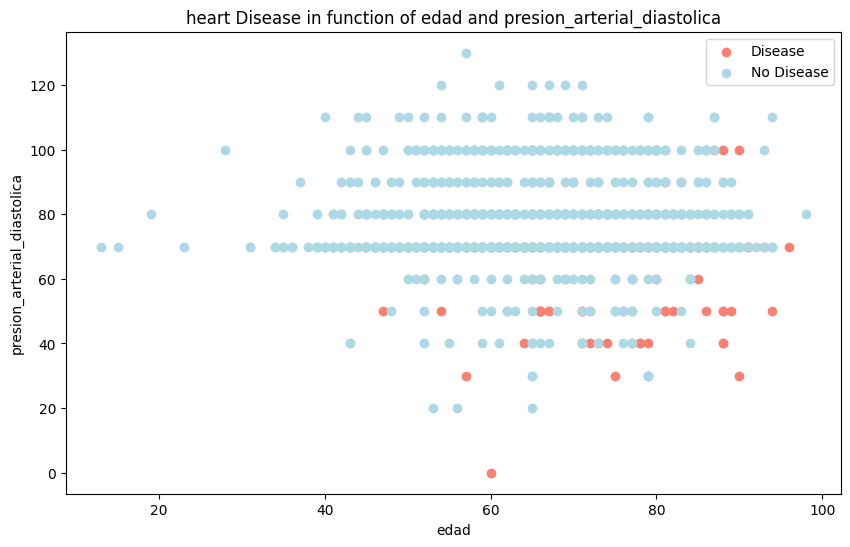

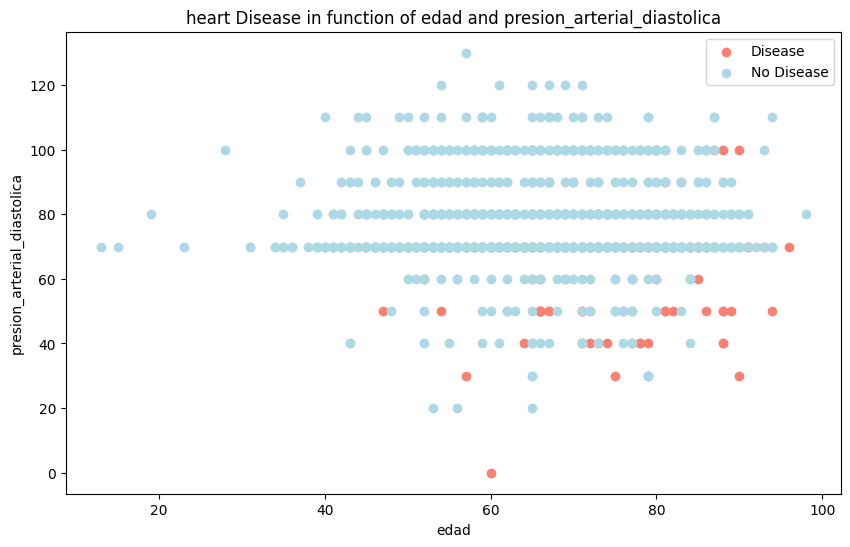

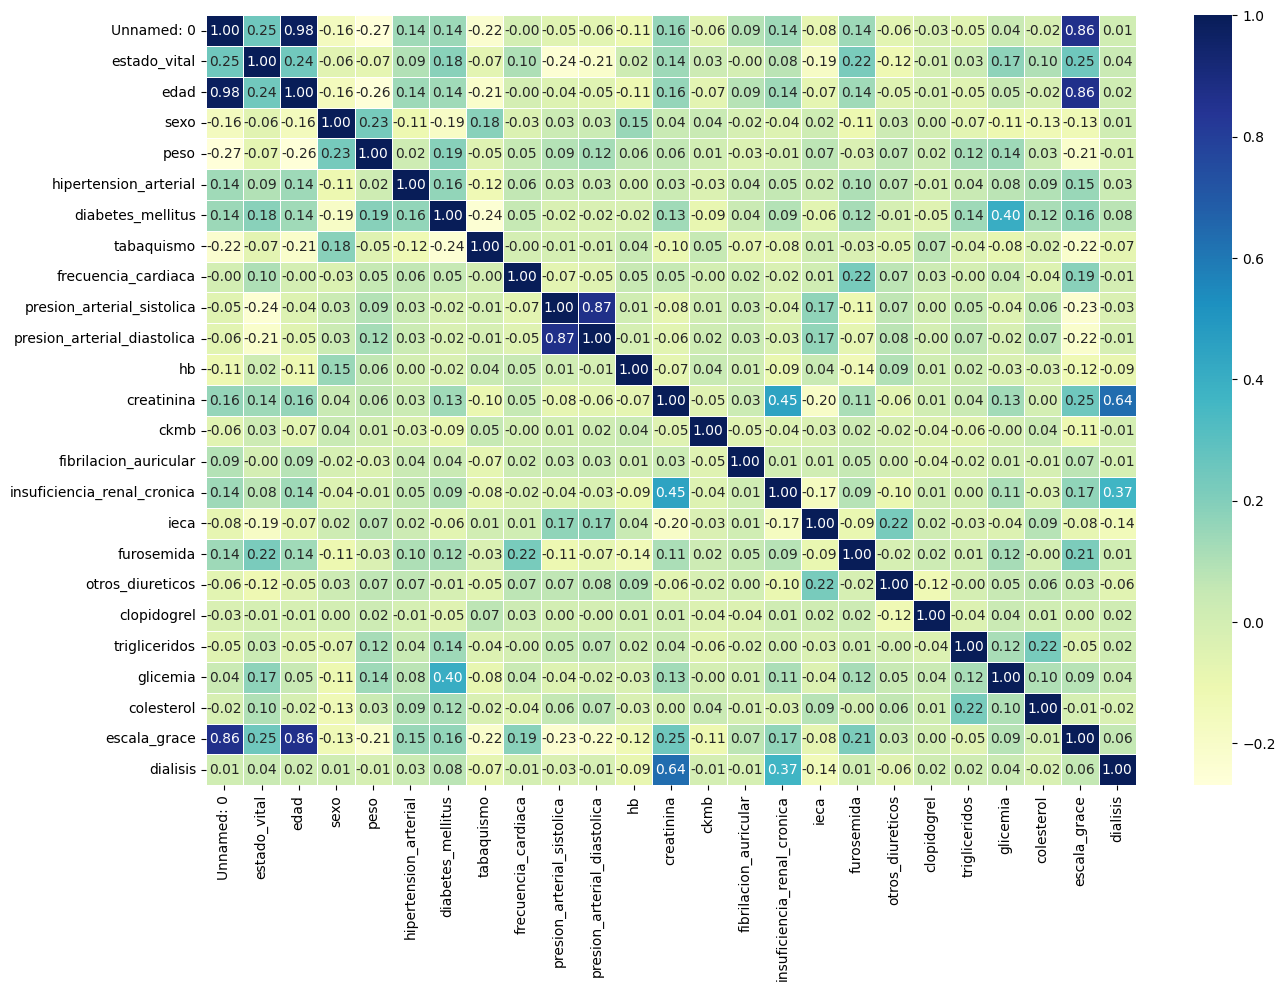

In [15]:
# Age vs max heart rate 
df.presion_arterial_diastolica.value_counts() # thalach=maximum heartrate achieved

# Craete another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.edad[df.estado_vital==1],
           df.presion_arterial_diastolica[df.estado_vital==1],
           c ="salmon")

#Sca tter with negative examples
plt.scatter(df.edad[df.estado_vital==0],
           df.presion_arterial_diastolica[df.estado_vital==0],
           c = "lightblue")

# Add some helpful info
plt.title("heart Disease in function of edad and presion_arterial_diastolica")
plt.xlabel("edad")
plt.ylabel("presion_arterial_diastolica")
plt.legend(["Disease", "No Disease"])

# Craete another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.edad[df.estado_vital==1],
           df.presion_arterial_diastolica[df.estado_vital==1],
           c ="salmon")

#Sca tter with negative examples
plt.scatter(df.edad[df.estado_vital==0],
           df.presion_arterial_diastolica[df.estado_vital==0],
           c = "lightblue")

# Add some helpful info
plt.title("heart Disease in function of edad and presion_arterial_diastolica")
plt.xlabel("edad")
plt.ylabel("presion_arterial_diastolica")
plt.legend(["Disease", "No Disease"])

# pd.crosstab(df.SHOCK, df.estado_vital)

# # Heart disease per SHOCK
# pd.crosstab(df.SHOCK,df.estado_vital).plot(kind="bar",
#                                  figsize=(10,6),
#                                  color=["salmon", "lightblue"])


# plt.title("Heart Disease Frequency Per SHOCK ")
# plt.xlabel("SHOCK")
# plt.ylabel("Amount")
# plt.legend(["No Disese", "Disese"])
# plt.xticks(rotation=0)

# Make a corealation matrix(how independent column interarct with each other)
df.corr()

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f", 
                cmap = "YlGnBu")


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 25)                625       
                                                                 
 dense_73 (Dense)            (None, 12)                312       
                                                                 
 dense_74 (Dense)            (None, 5)                 65        
                                                                 
 dense_75 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1008 (3.94 KB)
Trainable params: 1008 (3.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/14
45/45 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.7204 - val_loss: 0.6655 - val_accuracy: 0.9282
Epoch 2/14
45

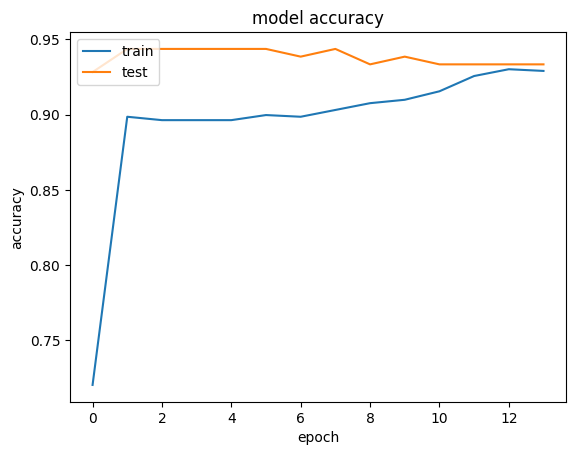

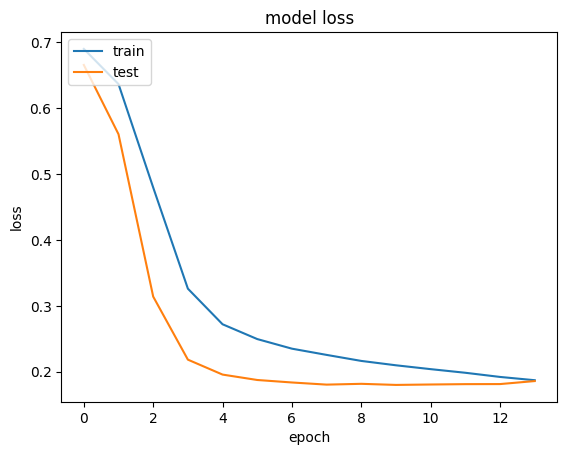

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# dataset=pd.read_csv("data_cleaned.csv")
# Create X and y
X = df.drop("estado_vital", axis=1)
y= df["estado_vital"]

# Split fata into train and ttest
np.random.seed(42)
#standardScaler = StandardScaler()
#columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
# X=dataset.iloc[:,0:13]
# y=dataset.iloc[:,13:14]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

#Creating a pipeline
model = Sequential()

#1st hidden layer with input layer
model.add(Dense(units=25,activation="relu",input_dim=24)) #59

#2nd hidden layer
model.add(Dense(units=12,activation="relu",))

#3rd hidden layer
model.add(Dense(units=5,activation="relu",))

# #4th hidden layer
# model.add(Dense(units=4,activation="relu",))



#output layer
model.add(Dense(units=1,activation="sigmoid"))

model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model_his=model.fit(X_train,y_train,validation_split=0.18, batch_size=20,epochs=14,verbose=1)


y_pred=model.predict(X_test)
y_pred = (y_pred > 0.45)
print(y_pred)
for i in y_pred:
    if i:
        print('Severe')
    else:
        print('Normal')
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)


print(classification_report(y_test,y_pred))


import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_his.history['accuracy'])
plt.plot(model_his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(model_his.history['loss'])
plt.plot(model_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



#model.save("heart.h5")